# Dimenionality reduction

### PCA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from time import time
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis, PCA

In [2]:
# 1.1
train_x = pd.read_csv('data/gisette_train.data.txt', sep=' ', header=None)
del train_x[5000]
train_y = pd.read_csv('data/gisette_train.labels.txt', header=None)
# since there is no labels for test dataset, we used cross-validation sets as test
test_x = pd.read_csv('data/gisette_valid.data.txt', sep=' ', header=None)
del test_x[5000]
test_y = pd.read_csv('data/gisette_valid.labels.txt', header=None)

In [4]:
# 1.2
orig_clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)
orig_clf.fit(train_x, train_y)
start = time()
orig_pred = orig_clf.predict(test_x)

orig_time = time()-start
orig_test_score = accuracy_score(test_y[0], orig_pred)
orig_test_score, orig_time

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.977, 0.02955794334411621)

Even though we have pretty good accuracy, doing binary classification using all 5000 features is not really efficient. We do not need all of that data.

In [5]:
# standardize data before applying PCA, as it is sensitive to scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_set_st = scaler.transform(train_x)
test_set_st = scaler.transform(test_x)

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/maryana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/home/maryana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [6]:
n = [5, 10, 20, 50, 100]

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

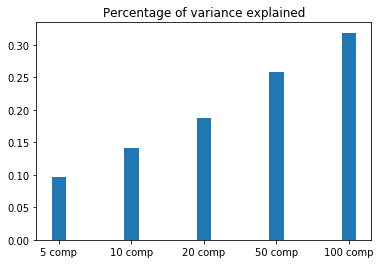

In [7]:
variance_ratios = []
pca_results = {} #ditictionary where keys are number of components and values - tuple (test_score, time_of_training)

for n_comp in n:
    #     1.3 
    pca = PCA(n_comp)
    pca.fit(train_set_st)
    train_set = pca.transform(train_set_st)
    test_set = pca.transform(test_set_st)
    
    variance_ratios.append(pca.explained_variance_ratio_)

    #     1.3.3
    clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)
    clf.fit(train_set, train_y)
    
    start = time()
    pred = clf.predict(test_set)
    curr_time = time()-start
    test_score = accuracy_score(test_y[0], pred)
    
    pca_results[n_comp] = (test_score, curr_time)
    
    train_set = train_set_st
    test_set = test_set_st

#    1.3.1 
x = np.arange(len(variance_ratios))
fig, ax = plt.subplots()
plt.bar(x, [sum(comps) for comps in variance_ratios], width=0.2)
plt.xticks(x, [str(n_comp)+' comp' for n_comp in n])
plt.title("Percentage of variance explained")
plt.show()

In [8]:
variance_ratios[-1]

array([0.02883488, 0.02258951, 0.01658598, 0.01616422, 0.01235432,
       0.01136313, 0.01019708, 0.00876289, 0.00723711, 0.00694271,
       0.00645336, 0.00561339, 0.00523542, 0.00490887, 0.00470669,
       0.00438171, 0.00404229, 0.00388625, 0.00369534, 0.00360771,
       0.00346193, 0.00333432, 0.00330496, 0.00318778, 0.00292639,
       0.00287909, 0.00276788, 0.00274088, 0.00265692, 0.00259822,
       0.00253786, 0.00243648, 0.00241136, 0.00229014, 0.00224686,
       0.00220293, 0.0021071 , 0.00208936, 0.00206475, 0.0019842 ,
       0.00196886, 0.00192608, 0.00190585, 0.0018689 , 0.00186241,
       0.00179441, 0.00176711, 0.00174811, 0.00170799, 0.00166205,
       0.00163305, 0.00160814, 0.00157355, 0.00157002, 0.00155171,
       0.00152175, 0.0014958 , 0.00147976, 0.00144629, 0.00144225,
       0.00141284, 0.0013852 , 0.00137602, 0.00135192, 0.00134651,
       0.00133136, 0.00132311, 0.0013061 , 0.00130144, 0.00128489,
       0.00127156, 0.00125926, 0.00123542, 0.00121215, 0.00119

###### 1.3.2 
What can you tell about the amount of variance each additional component explains?

PCA algorithm fits the first component so that it explains most variance(2,883 % of the whole data variance in this case), each additional will explain less. As we can see from the code above each new component explains less and less variance of the data.

### Factor Analysis

In [9]:
n = [3, 5, 10, 20, 50, 100]

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

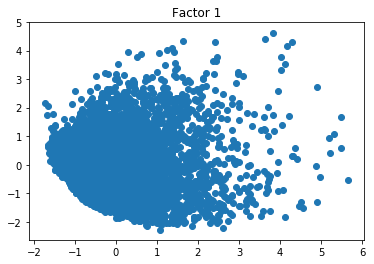

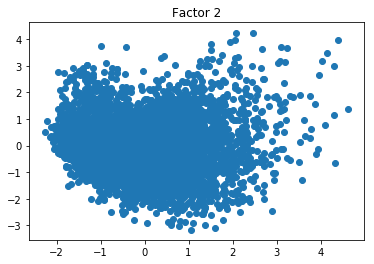

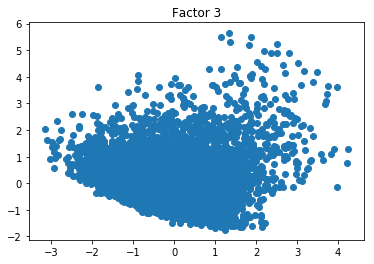

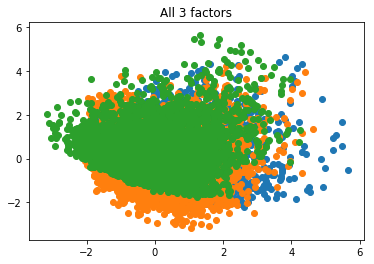

In [10]:
# variance_ratios = []
fa_results = {} #ditictionary where keys are number of factors and values - tuple (test_score, time_of_training)

for n_facs in n:
    
    #     1.4 
    fa = FactorAnalysis(n_components=n_facs)
    fa.fit(train_x.values)
    train_set = fa.transform(train_x.values)
    test_set = fa.transform(test_x.values)
    
    #     1.4.1
    if n_facs == 3:
        plt.figure()
        plt.title('Factor 1')
        plt.scatter(train_set[:,0], train_set[:,1])
        
        plt.figure()
        plt.title('Factor 2')
        plt.scatter(train_set[:,1], train_set[:,2])
        
        plt.figure()
        plt.title('Factor 3')
        plt.scatter(train_set[:,2], train_set[:,0])
        
        plt.figure()
        plt.title('All 3 factors')
        plt.scatter(train_set[:,0], train_set[:,1])
        plt.scatter(train_set[:,1], train_set[:,2])
        plt.scatter(train_set[:,2], train_set[:,0])

    #     1.4.2
    clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)
    clf.fit(train_set, train_y)
    
    start = time()
    pred = clf.predict(test_set)
    curr_time = time()-start
    test_score = accuracy_score(test_y[0], pred)
    
    fa_results[n_facs] = (test_score, curr_time)
    

##### 5.1

In [11]:
pca_results['original'] = (orig_test_score, orig_time)
pd.DataFrame(data=pca_results)

,5,10,20,50,100,original
0,0.842000,0.917000,0.954000,0.9740,0.978000,0.977000
1,0.000138,0.000147,0.000245,0.0006,0.000271,0.029558


In [12]:
fa_results['original'] = (orig_test_score, orig_time)
pd.DataFrame(data=fa_results)

,3,5,10,20,50,100,original
0,0.740000,0.857000,0.916000,0.944000,0.975000,0.980000,0.977000
1,0.000134,0.000166,0.000151,0.000168,0.000209,0.000316,0.029558


As we can see in both FA and PCA when we have small number of components like 5 or 3 accuracy decreases for about 10%. But when we have like 100 components the change in accuracy is not so significant (or the same (or better)) but we still have better performance because the data is reduced. 

PCA assumes that the principle components are orthogonal linear combinations of the features in a dataset, which is not always true. Also it assumes that the more variance the more important the dimention, which also can be false.
But it is fast and quite simple.

FA can find correlation even if the data is random, which is sometimes not needed. It is hard to decide on number of factors.

PCA is more of an observational method: it shifts axes so that they explain most variance, while FA is a modelling method: it tres to model one variable that represents a whole correlated group of variables.

PCA usages: reduce dimentionality, try to better understand the data, project onto lower space.
FA usages: reduce dimentionality, explore correlations of the variables in data,